In [2]:
negative = ['못생김', '구리다', '']
positive = ['깔끔', '멋진', '만족', '좋아', '예쁘다', ]

In [36]:
import pandas as pd

df = pd.read_csv('./합본1/기아+기아.csv')
df

,Unnamed: 0,comments,likes
0,0,오늘시승한 걸 피디님과 작가님들이 정말 머리에 불나도록 고생해서 올렸습니다. 이렇게...,363.0
1,1,영상 올라올때마다 보는데 시승할때마다 피드백을 깔끔하게 잘하시는거 같아요 피드백에서...,4.0
2,2,웬만하면 잘 넘어가지 않은 편인데 대리점가서 보고 시승하고픈 생각이 들게 만드네요....,2.0
3,3,한국차의 성능을 한단계 끌어 올린 멋진 차네요!! 특히 만족할만한 오디오까지!! 디...,2.0
4,4,"디자인은 확실히 좋아 졌네요. 하체구성, 심장병있는 엔진도 좋아지면 좋겠어요.",1.0
...,...,...,...
3493,3488,전기차 뭘살까 고민 했는데 이영상 보고 정했습니다 모델Y,1.0
3494,3489,디자인 너무 읔ㅜㅜ 테슬라보다 몬생긴 유일한 차 같은,1.0
3495,3490,내비도 마음에 안들고 핸들도 조잡하고 계기판도 복잡하고 충전도 복잡하고 수납공간도 ...,1.0
3496,3491,저는 예쁘지가 않네요..... 디자인은 머 개인취향이지만 먼가 조잡함. 아이오닉5는...,1.0


In [33]:
df_labeling = df[['title']]

titles = df_labeling.values.tolist()

titles

[['에디슨EV "채권자가 법원에 파산 신청…채권액 36억원"'],
 ['LG전자, 차량용 반도체 내재화 추진…개발 기술 인증받아'],
 ['일진머티리얼즈, 폭스바겐그룹의 스페인 전기차 프로젝트 참여'],
 ['쌍용차 인수 중도포기 없다…인수후보 4곳 인수제안서 제출 방침'],
 ['호세 무뇨스 현대차 사장 이사회 합류…글로벌시장 챙긴다'],
 ['반도체 수급난 탓?…인천항 신차 수출↓ 중고차 수출↑'],
 ['인천항 스마트 오토밸리 본격화…2025년 중고차수출단지 이전'],
 ['인천항, 올해 중고차 수출 8월까지 46% 증가'],
 ['인천항, 수출용 중고차 운반선 못 구해 `아우성`'],
 ['인천항, 올해 들어 중고차 수출 회복 `기지개`'],
 ['영업용 화물차주, ‘신차 60%·중고차 40%’로 트럭 구매'],
 ['돌파구 못 찾는 현대차 중고차시장 진출…중고차업계 `반발`'],
 ['인천서 불에 탄 중고차 100대 2주째 방치…"당장 처분 어려워"'],
 ['인천항 작년 중고차 34만6천대 수출…17.5% 감소'],
 ['중고차 100대 불에 탄 인천 중고차단지…"포탄 떨어진 줄"'],
 ['인천 중고차수출단지서 큰불…차량 80여대 불타'],
 ['옆 매장 중고차 훔쳐 판 40대 딜러 징역 6개월'],
 ['인천 신항 1-3단계 부지, 수출용 중고차 장치장으로 임시활용'],
 ['인천 중고차 수출업체 컨테이너서 불…차량 2대 등 타'],
 ['람보르기니도 공식인증 중고차 사업 개시…전용 전시장 열어'],
 ['인천, 중고차 전문 수출단지 조성사업 추진 TF 가동'],
 ['박영선, 현대차 중고차 진출에 "쉽지 않겠지만 접점 찾는 중"'],
 ['인천, 중고차 전문 수출단지 `스마트 오토밸리` 추진 TF 구성'],
 ['경기도, 중고차사이트 `허위·미끼매물` 빅데이터 활용 상시점검'],
 ['박영선, 현대차 중고차시장 진출 관련 "정의선 만날 의향 있다"'],
 ['중고차 사기단에 잇단 `철퇴`…대법 "범죄집단으로 봐야"'],
 ['현대차 중고차 시

In [34]:
labels = []

for title in titles:
    negative_flag = False
    label = 0
    for i in range(len(negative)):
        if negative[i] in title:
            label = -1
            negative_flag = True
            break
    if negative_flag == False:
        for i in range(len(positive)):
            if positive[i] in title:
                label = 1
                break
    
    labels.append(label)

df_labeling['label'] = labels

In [35]:
df_labeling[df_labeling['label'] == 1]

,title,label


In [23]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_labeling, test_size = 0.25, random_state = 42)
len(train_data), len(test_data)

(2253, 751)

<AxesSubplot:>

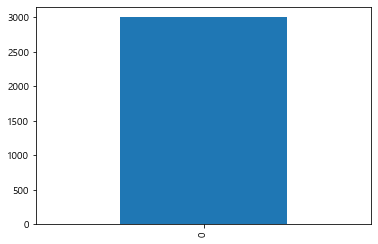

In [24]:
import matplotlib.pyplot as plt

df_labeling['label'].value_counts().plot(kind='bar')

In [25]:
train_data.groupby('label').size().reset_index(name = 'count')

,label,count
0,0,2253


In [ ]:
from konlpy.tag import Okt; t = Okt()

t.morphs('정상에 선 기쁨을 다른 사람들과 함께 나누자')

In [ ]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [ ]:
train_data['tokenized'] = train_data['제목'].apply(t.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
test_data['tokenized'] = test_data['제목'].apply(t.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
import numpy as np

neutral_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
negative_words = np.hstack(train_data[train_data.label == -1]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [ ]:
from collections import Counter

neutral_word_count = Counter(positive_words)
print(neutral_word_count.most_common(20))

In [ ]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

In [ ]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(neutral_word_count)
plt.figure()
plt.imshow(gen)

In [ ]:
wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(negative_word_count)
plt.figure()
plt.imshow(gen)

In [ ]:
wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(positive_word_count)
plt.figure()
plt.imshow(gen)

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='purple')
ax1.set_title('Neutral titles')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('중립 제목의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==-1]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative titles')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 제목의 평균 길이 :', np.mean(text_len))


fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive titles')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 제목의 평균 길이 :', np.mean(text_len))

In [ ]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

In [ ]:
vocab_size = total_cnt - rare_cnt + 2
vocab_size

In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print('제목의 최대 길이 :',max(len(review) for review in X_train))
print('제목의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 80
below_threshold_len(max_len, X_train)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

In [ ]:
def sentiment_predict(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = t.morphs(new_sentence)
    new_sentence = [word for word in new_sentence if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen = max_len)
    
    score = float(loaded_model.predict(pad_new))
    if (score = 0):
        print("{:.2f}% 확률로 중립 제목입니다.".format(score * 100))
    elif (score = -1):
        print("{:.2f}% 확률로 부정 제목입니다.".format((1 - score) * 100))
    else:
        print("{:.2f}% 확률로 부정 제목입니다.".format((1 - score) * 100))